In [1]:
#Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
import seaborn as sns
#allow all columns to be viewed:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import f_oneway

## Calendar Table Analysis

In [2]:
#Creating the dataframe
calendar_df = pd.read_csv('calendar.csv')

In [3]:
#Analysing the first 5 rows
calendar_df.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125


In [4]:
#Finding number of rows and columns
calendar_df.shape

(319192, 8)

In [5]:
#Calculating the frequency of each unique listing_id
calendar_df['listing_id'].value_counts()

46810177    209
42635704    208
36963032    208
2347414     208
40129833    207
           ... 
51134319    156
50254843    155
30414744    153
52014982    151
20781256    151
Name: listing_id, Length: 1749, dtype: int64

In [6]:
#Finding column names, data types and constraints
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   calender_id     319192 non-null  int64  
 1   listing_id      319192 non-null  int64  
 2   date            319192 non-null  object 
 3   available       319192 non-null  int64  
 4   price           319117 non-null  float64
 5   adjusted_price  319117 non-null  float64
 6   minimum_nights  319192 non-null  int64  
 7   maximum_nights  319192 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 19.5+ MB


In [7]:
#Analysing the null values
calendar_df.isnull().sum()

calender_id        0
listing_id         0
date               0
available          0
price             75
adjusted_price    75
minimum_nights     0
maximum_nights     0
dtype: int64

In [8]:
#Summamry Stats for the numerical columns
calendar_df.describe()

,calender_id,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights
count,319192.000000,3.191920e+05,319192.000000,319117.000000,319117.000000,319192.000000,319192.000000
mean,159596.500000,3.488528e+07,0.535192,109.917779,109.712131,5.379395,812.206102
std,92142.937899,1.523257e+07,0.498761,185.791168,185.551851,21.456127,511.622075
min,1.000000,5.090400e+04,0.000000,13.000000,13.000000,1.000000,1.000000
25%,79798.750000,2.338661e+07,0.000000,59.000000,58.000000,1.000000,365.000000
50%,159596.500000,3.891969e+07,1.000000,79.000000,79.000000,2.000000,1125.000000
75%,239394.250000,4.839174e+07,1.000000,115.000000,115.000000,3.000000,1125.000000
max,319192.000000,5.398332e+07,1.000000,5800.000000,5800.000000,500.000000,9999.000000


In [9]:
#Changing datatype of date column
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

In [10]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   calender_id     319192 non-null  int64         
 1   listing_id      319192 non-null  int64         
 2   date            319192 non-null  datetime64[ns]
 3   available       319192 non-null  int64         
 4   price           319117 non-null  float64       
 5   adjusted_price  319117 non-null  float64       
 6   minimum_nights  319192 non-null  int64         
 7   maximum_nights  319192 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 19.5 MB


In [11]:
calendar_df['date'] = calendar_df['date'].dt.date

The datatype of the column is object and is displayed along with timestamp. 

In [12]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   calender_id     319192 non-null  int64  
 1   listing_id      319192 non-null  int64  
 2   date            319192 non-null  object 
 3   available       319192 non-null  int64  
 4   price           319117 non-null  float64
 5   adjusted_price  319117 non-null  float64
 6   minimum_nights  319192 non-null  int64  
 7   maximum_nights  319192 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 19.5+ MB


In [13]:
calendar_df.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03,0,56.0,56.0,3,5
1,2,22742449,2022-11-13,1,95.0,95.0,2,99
2,3,34621717,2022-04-17,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21,0,100.0,100.0,2,1125


In [14]:
#Null value treatment, finding mean
calendar_df['price'].mean()

109.91777937245587

The price column is continuos and numerical. So imputing with mean is the appropriate option for Null value treatment

In [15]:
#imputation of mean
calendar_df['price'].fillna(calendar_df['price'].mean(),inplace =True)

In [16]:
calendar_df['price'].isnull().sum()

0

#### Task 1: Number of rows and unique listing ids

In [17]:
#Number of rows and unique listing_id(Task1)
No_of_rows_in_calendar = calendar_df.shape[0]
print("Number of rows in calendar is",No_of_rows_in_calendar)
Calendar_unique_listing_id = calendar_df['listing_id'].nunique()
print("Number of unique listing_ids in calendar table is",Calendar_unique_listing_id)

Number of rows in calendar is 319192
Number of unique listing_ids in calendar table is 1749


From the above data we can interpret that the properties have been listed multiple times in AirBnb. 

In [18]:
#Finding the duplicate rows
duplicate_rows = calendar_df.duplicated(subset = ['calender_id'])
number_of_duplicate_rows = duplicate_rows.sum()
print(number_of_duplicate_rows)

0


As there are no duplicate rows present we dont have to remove any duplicate data

In [19]:
calendar_df['price'].value_counts()

75.0     12524
65.0     11543
80.0     11357
60.0     10739
49.0     10470
         ...  
347.0        1
352.0        1
682.0        1
623.0        1
404.0        1
Name: price, Length: 599, dtype: int64

In [20]:
price_higher = calendar_df[calendar_df['price']>199]
print(price_higher)

        calender_id  listing_id        date  available   price  \
7                 8    36963744  2022-11-30          0  1000.0   
11               12    31130575  2022-09-04          1   240.0   
16               17    41703665  2022-11-02          0   200.0   
23               24    48193498  2022-04-28          0   300.0   
25               26    27479453  2022-09-18          0   250.0   
...             ...         ...         ...        ...     ...   
319122       319123    53355067  2022-08-11          1   650.0   
319150       319151    39482529  2022-12-10          0   520.0   
319166       319167    23364073  2022-10-07          1   343.0   
319174       319175    49046146  2022-02-13          1   280.0   
319181       319182    35206126  2022-03-14          1   220.0   

        adjusted_price  minimum_nights  maximum_nights  
7               1000.0               1             999  
11               240.0               2            1125  
16               200.0              

In [21]:
import seaborn as sns

<Axes: xlabel='price'>

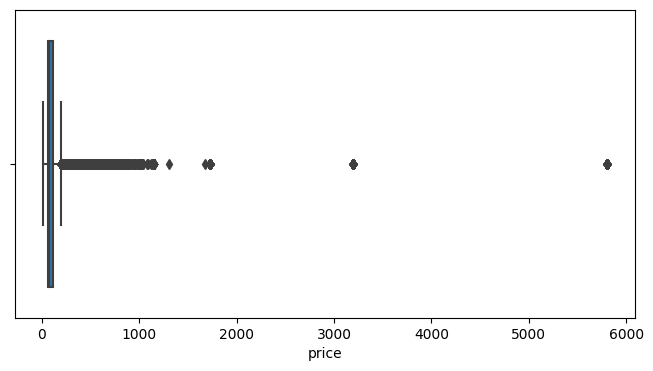

In [22]:
plt.figure(figsize = (8,4))
sns.boxplot(x='price', data = calendar_df)


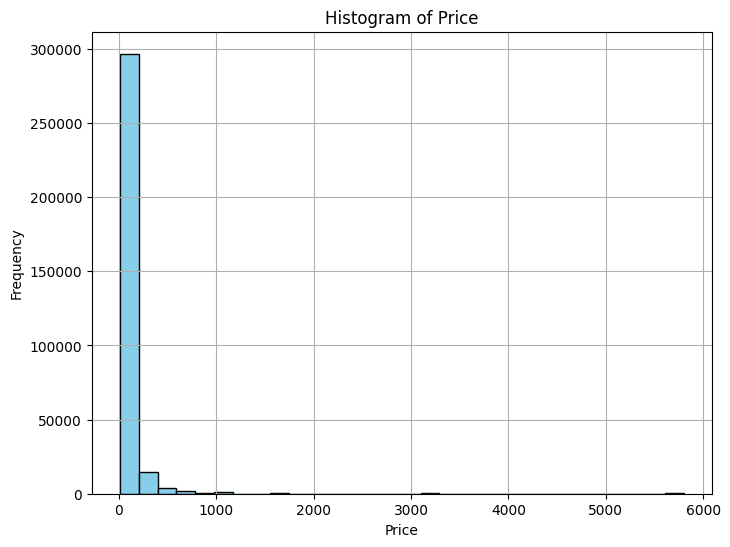

In [23]:
plt.figure(figsize=(8, 6))
plt.hist(calendar_df['price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.grid(True)
plt.show()

In [24]:
#Outlier Treatment
def outlier_treatment(column_name):
    sorted(column_name)
    Q1,Q3 =np.percentile(column_name,[25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range
    

In [25]:
lower,upper = outlier_treatment(calendar_df['price'])
print(lower,upper)

-25.0 199.0


In [26]:

    #Replacing outliers with lower or upper values
    def treat_outliers(column_name):
        
        lower,upper = outlier_treatment(calendar_df['price'])
    
        calendar_df['price'] = np.where(calendar_df['price']<lower,lower, calendar_df['price'])
        calendar_df['price'] = np.where(calendar_df['price']>upper,upper, calendar_df['price'])
        
        return column_name
    
    

In [27]:
calendar_df['price_treated']= treat_outliers(calendar_df['price'])

In [28]:
calendar_df.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,price_treated
0,1,40334325,2022-08-03,0,56.0,56.0,3,5,56.0
1,2,22742449,2022-11-13,1,95.0,95.0,2,99,95.0
2,3,34621717,2022-04-17,0,75.0,75.0,2,1125,75.0
3,4,38281744,2022-01-31,1,150.0,150.0,1,1000,150.0
4,5,18835003,2022-05-21,0,100.0,100.0,2,1125,100.0


In [29]:
calendar_df.tail()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,price_treated
319187,319188,52729945,2022-07-06,1,64.0,64.0,1,10,64.0
319188,319189,36953202,2022-07-08,0,140.0,140.0,3,1125,140.0
319189,319190,39580214,2022-06-13,1,49.0,49.0,1,13,49.0
319190,319191,49016014,2022-10-26,0,60.0,60.0,2,30,60.0
319191,319192,31438714,2022-06-12,0,104.0,104.0,2,1125,104.0


In [30]:
price_higher = calendar_df[calendar_df['price_treated']>199]
print(price_higher)

        calender_id  listing_id        date  available  price  adjusted_price  \
7                 8    36963744  2022-11-30          0  199.0          1000.0   
11               12    31130575  2022-09-04          1  199.0           240.0   
16               17    41703665  2022-11-02          0  199.0           200.0   
23               24    48193498  2022-04-28          0  199.0           300.0   
25               26    27479453  2022-09-18          0  199.0           250.0   
...             ...         ...         ...        ...    ...             ...   
319122       319123    53355067  2022-08-11          1  199.0           585.0   
319150       319151    39482529  2022-12-10          0  199.0           468.0   
319166       319167    23364073  2022-10-07          1  199.0           343.0   
319174       319175    49046146  2022-02-13          1  199.0           280.0   
319181       319182    35206126  2022-03-14          1  199.0           220.0   

        minimum_nights  max

<Axes: xlabel='price'>

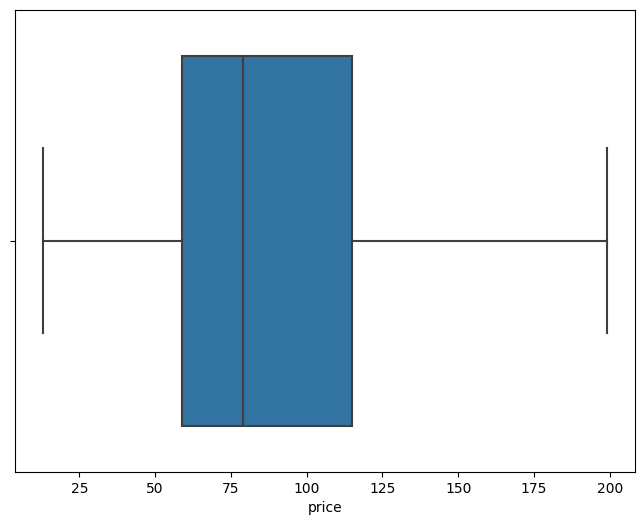

In [31]:
plt.figure(figsize = (8,6))
sns.boxplot(x='price', data = calendar_df)

#### The columns needed for the modelling are  listing_id, date and price

## Listing Table Analysis

In [32]:
listings_df = pd.read_csv('listings.csv')

In [33]:
listings_df.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933


In [34]:
listings_df['amenities']

0       ["Kitchen", "Smoke alarm", "Hair dryer", "Keyp...
1       ["Refrigerator", "Elevator", "Paid street park...
2       ["Paid street parking off premises", "Kitchen"...
3       ["Fire extinguisher", "Backyard", "Long term s...
4       ["Refrigerator", "Kitchen", "Smoke alarm", "Sh...
                              ...                        
1744    ["Refrigerator", "Elevator", "Yamaha RX-A550 s...
1745    ["Hot water", "Long term stays allowed", "Kitc...
1746    ["Kitchen", "Smoke alarm", "Outdoor furniture"...
1747    ["Refrigerator", "Private garden or backyard",...
1748    ["Kitchen", "Voice command Google  Bluetooth s...
Name: amenities, Length: 1749, dtype: object

#### From listings df the predictor columns identified are property_type, room_type,accomodates,bedrooms, beds

In [35]:
#Finding number of rows and columns
listings_df.shape

(1749, 14)

In [36]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1749 non-null   int64  
 1   listing_url     1749 non-null   object 
 2   name            1749 non-null   object 
 3   description     1679 non-null   object 
 4   latitude        1749 non-null   float64
 5   longitude       1749 non-null   float64
 6   property_type   1749 non-null   object 
 7   room_type       1749 non-null   object 
 8   accomodates     1749 non-null   int64  
 9   bathrooms_text  1749 non-null   object 
 10  bedrooms        1621 non-null   float64
 11  beds            1708 non-null   float64
 12  amenities       1749 non-null   object 
 13  host_id         1749 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 191.4+ KB


In [37]:
listings_df.describe()

,listing_id,latitude,longitude,accomodates,bedrooms,beds,host_id
count,1.749000e+03,1749.000000,1749.000000,1749.000000,1621.000000,1708.000000,1.749000e+03
mean,3.485506e+07,51.214069,4.413165,3.761578,1.529303,2.220726,1.417765e+08
std,1.523689e+07,0.013740,0.019373,2.771378,1.091453,2.227509,1.286506e+08
min,5.090400e+04,51.160084,4.290770,1.000000,1.000000,1.000000,2.340770e+05
25%,2.337286e+07,51.207870,4.400240,2.000000,1.000000,1.000000,2.875771e+07
50%,3.889829e+07,51.216540,4.409460,3.000000,1.000000,2.000000,1.033633e+08
75%,4.838954e+07,51.220880,4.424660,4.000000,2.000000,3.000000,2.344842e+08
max,5.398332e+07,51.349400,4.483470,16.000000,20.000000,44.000000,4.373093e+08


In [38]:
#Analysing the null values
listings_df.isnull().sum()

listing_id          0
listing_url         0
name                0
description        70
latitude            0
longitude           0
property_type       0
room_type           0
accomodates         0
bathrooms_text      0
bedrooms          128
beds               41
amenities           0
host_id             0
dtype: int64

#### From above information, we can see that among the selected predictor columns bedrooms and beds are only having missing values.

In [39]:
listings_df['bedrooms'].value_counts()

1.0     1047
2.0      428
3.0       91
4.0       31
5.0       11
7.0        5
10.0       2
11.0       1
8.0        1
6.0        1
9.0        1
15.0       1
20.0       1
Name: bedrooms, dtype: int64

In [40]:
listings_df['beds'].value_counts()

1.0     796
2.0     454
3.0     185
4.0     132
5.0      60
6.0      42
7.0      13
8.0       5
10.0      5
16.0      3
9.0       3
12.0      3
11.0      1
44.0      1
15.0      1
25.0      1
14.0      1
20.0      1
33.0      1
Name: beds, dtype: int64

In [41]:
#Null Value Treatment,as the bedrooms & beds values are kind of discrete, imputing by mode seems ideal.
listings_df['bedrooms'].mode()

0    1.0
Name: bedrooms, dtype: float64

In [42]:
listings_df['beds'].mode()

0    1.0
Name: beds, dtype: float64

In [43]:
#imputation of mode to bedrooms column:
listings_df['bedrooms'].fillna(listings_df['bedrooms'].mode()[0],inplace = True)

In [44]:
listings_df['bedrooms'].isnull().sum()

0

In [45]:
#imputaion of mode to beds column:
listings_df['beds'].fillna(listings_df['beds'].mode()[0],inplace = True)

In [46]:
listings_df['beds'].isnull().sum()

0

In [47]:
listings_df.isnull().sum()

listing_id         0
listing_url        0
name               0
description       70
latitude           0
longitude          0
property_type      0
room_type          0
accomodates        0
bathrooms_text     0
bedrooms           0
beds               0
amenities          0
host_id            0
dtype: int64

Text(0, 0.5, 'Property Type')

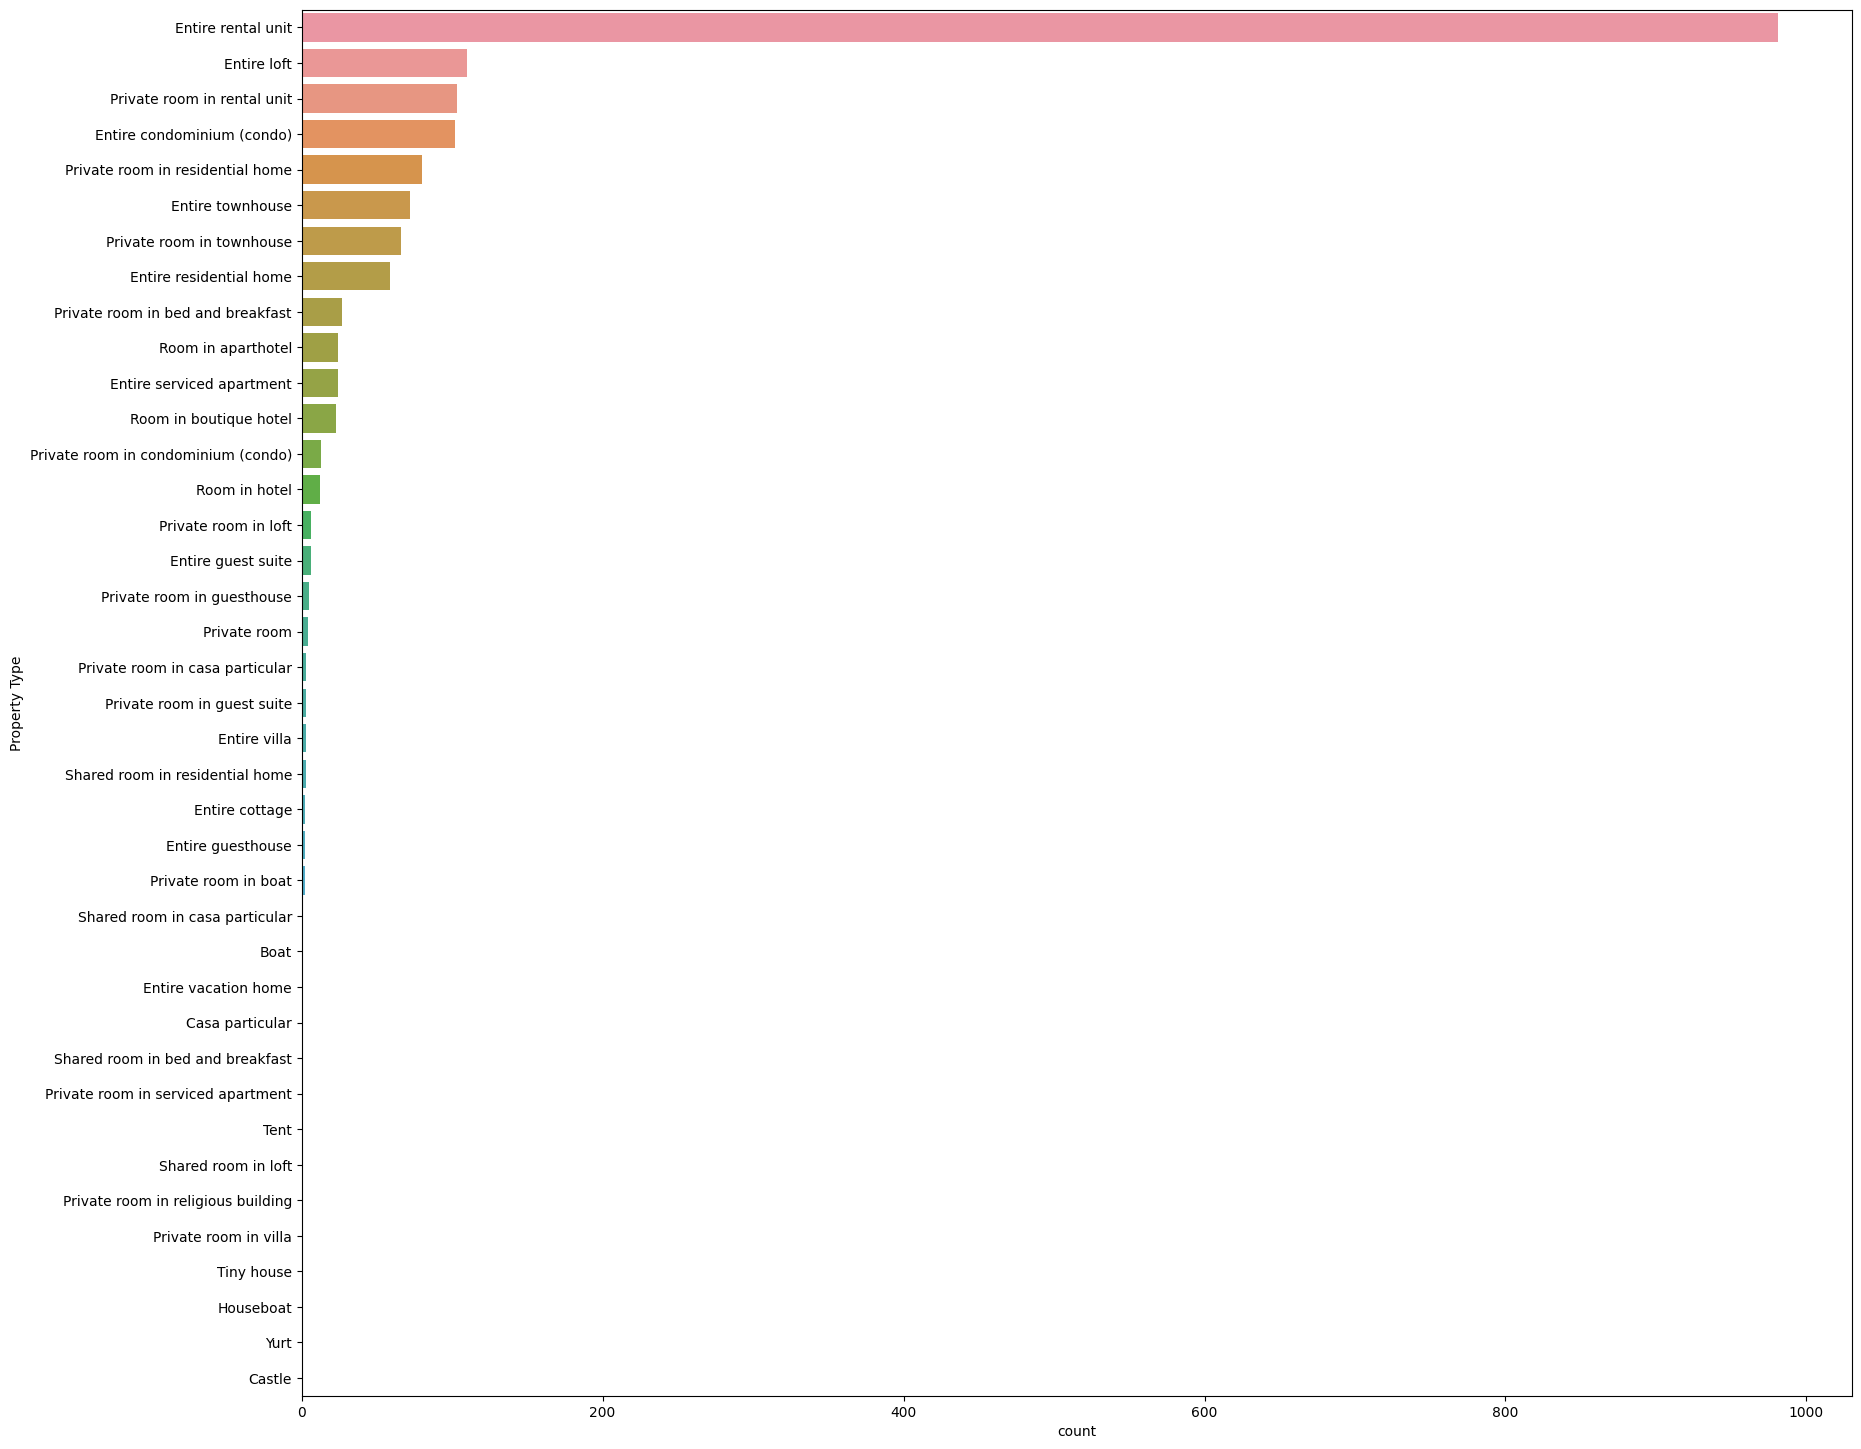

In [48]:
#Analysing the property types and their counts
fig=plt.figure(figsize=(20, 18), dpi=100)
sns.countplot(y='property_type', data=listings_df, order=listings_df['property_type'].value_counts().index)
plt.ylabel("Property Type")

## Reviews Table Analysis

In [49]:
reviews_df = pd.read_csv('reviews.csv')

In [50]:
reviews_df.head()

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06 00:00:00.000000,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10 00:00:00.000000,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05 00:00:00.000000,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25 00:00:00.000000,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03 00:00:00.000000,7984251,Marcel,This is a very nice appartement. We really lik...


In [51]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62987 entries, 0 to 62986
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_id      62987 non-null  int64 
 1   listing_id     62987 non-null  int64 
 2   date           62987 non-null  object
 3   reviewer_id    62987 non-null  int64 
 4   reviewer_name  62987 non-null  object
 5   comments       62923 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.9+ MB


In [52]:
comment_for_review_id_1 = reviews_df.loc[reviews_df['review_id'] == 1, 'comments'].values[0]

In [53]:
print(comment_for_review_id_1)

Karin’s “Aplace” is absolutely beautiful and cozy boutique hotel in the center of Antwerp. The Host, Karin is an amazing, warm and kind person who truly puts her hearts and soul into making her guests feel like at home. The apartment is beautifully furnished with mix of retro and modern style - I was so amazed about all of elegant details. The place is very close to almost everything in Antwerp. I highly recommend!


In [54]:
comment_for_review_id_2 = reviews_df.loc[reviews_df['review_id'] == 2, 'comments'].values[0]

In [55]:
print(comment_for_review_id_2)

Karin is a wonderful host, she was really helpful ! Highly recommended for a stay in Antwerp.


In [56]:
comment_for_review_id_3 = reviews_df.loc[reviews_df['review_id'] == 3, 'comments'].values[0]
print(comment_for_review_id_3)

<br/>


In [57]:
comment_for_review_id_4 = reviews_df.loc[reviews_df['review_id'] == 3, 'comments'].values[0]
print(comment_for_review_id_4)

<br/>


In [58]:
reviews_df.describe()

,review_id,listing_id,reviewer_id
count,62987.00000,6.298700e+04,6.298700e+04
mean,31494.00000,2.277250e+07,1.148883e+08
std,18182.92504,1.417794e+07,1.132804e+08
min,1.00000,5.090400e+04,5.150000e+02
25%,15747.50000,9.913124e+06,2.433136e+07
50%,31494.00000,2.165832e+07,7.226982e+07
75%,47240.50000,3.405420e+07,1.782096e+08
max,62987.00000,5.382519e+07,4.367984e+08


#### No review columns are relevant for modelling

## Hosts Table Analysis

In [59]:
hosts_df = pd.read_csv('hosts.csv')

In [60]:
hosts_df.head()

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04 00:00:00.000000,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN
3,452791,Tatiana,2011-03-20 00:00:00.000000,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25 00:00:00.000000,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...


In [61]:
hosts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host_id        1111 non-null   int64 
 1   host_name      1111 non-null   object
 2   host_since     1111 non-null   object
 3   host_location  1108 non-null   object
 4   host_about     490 non-null    object
dtypes: int64(1), object(4)
memory usage: 43.5+ KB


In [62]:
hosts_df.isnull().sum()

host_id            0
host_name          0
host_since         0
host_location      3
host_about       621
dtype: int64

In [63]:
hosts_df.describe()

,host_id
count,1.111000e+03
mean,1.268568e+08
std,1.282286e+08
min,2.340770e+05
25%,2.361567e+07
50%,6.618861e+07
75%,2.143271e+08
max,4.373093e+08


#### No host columns are relevant for modelling

## Aggregated data view creation and analysis

In [64]:
airbnb_df = pd.merge(calendar_df[['listing_id','date', 'price']], 
listings_df[['listing_id', 'property_type', 'room_type', 'accomodates', 'bedrooms', 'beds',]], on='listing_id', how='inner')


In [65]:
airbnb_df.head()

,listing_id,date,price,property_type,room_type,accomodates,bedrooms,beds
0,40334325,2022-08-03,56.0,Entire rental unit,Entire home/apt,2,1.0,2.0
1,40334325,2022-02-14,56.0,Entire rental unit,Entire home/apt,2,1.0,2.0
2,40334325,2022-04-26,56.0,Entire rental unit,Entire home/apt,2,1.0,2.0
3,40334325,2022-04-08,56.0,Entire rental unit,Entire home/apt,2,1.0,2.0
4,40334325,2022-04-11,56.0,Entire rental unit,Entire home/apt,2,1.0,2.0


In [66]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319192 entries, 0 to 319191
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   listing_id     319192 non-null  int64  
 1   date           319192 non-null  object 
 2   price          319192 non-null  float64
 3   property_type  319192 non-null  object 
 4   room_type      319192 non-null  object 
 5   accomodates    319192 non-null  int64  
 6   bedrooms       319192 non-null  float64
 7   beds           319192 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 21.9+ MB


In [67]:
duplicates = airbnb_df[airbnb_df.duplicated(subset=['listing_id', 'price'], keep=False)]
print(duplicates)

        listing_id        date  price               property_type  \
0         40334325  2022-08-03   56.0          Entire rental unit   
1         40334325  2022-02-14   56.0          Entire rental unit   
2         40334325  2022-04-26   56.0          Entire rental unit   
3         40334325  2022-04-08   56.0          Entire rental unit   
4         40334325  2022-04-11   56.0          Entire rental unit   
...            ...         ...    ...                         ...   
319187    52592822  2022-04-10   30.0  Entire condominium (condo)   
319188    52592822  2022-08-01   30.0  Entire condominium (condo)   
319189    52592822  2022-12-20   30.0  Entire condominium (condo)   
319190    52592822  2022-07-17   30.0  Entire condominium (condo)   
319191    52592822  2022-07-09   30.0  Entire condominium (condo)   

              room_type  accomodates  bedrooms  beds  
0       Entire home/apt            2       1.0   2.0  
1       Entire home/apt            2       1.0   2.0  
2     

In [68]:
duplicates.count()

listing_id       317410
date             317410
price            317410
property_type    317410
room_type        317410
accomodates      317410
bedrooms         317410
beds             317410
dtype: int64

In [69]:
# Checking for duplicate listing ids with same price after merging 
airbnb_df.drop_duplicates(subset=['listing_id', 'price'], inplace=True)
airbnb_df.reset_index(drop=True, inplace=True)

print(airbnb_df.head())

   listing_id        date  price       property_type        room_type  \
0    40334325  2022-08-03   56.0  Entire rental unit  Entire home/apt   
1    22742449  2022-11-13   95.0  Entire rental unit  Entire home/apt   
2    22742449  2022-06-28  112.0  Entire rental unit  Entire home/apt   
3    22742449  2022-01-02  155.0  Entire rental unit  Entire home/apt   
4    22742449  2022-09-05  125.0  Entire rental unit  Entire home/apt   

   accomodates  bedrooms  beds  
0            2       1.0   2.0  
1            4       2.0   2.0  
2            4       2.0   2.0  
3            4       2.0   2.0  
4            4       2.0   2.0  


In [70]:
airbnb_df.shape

(8931, 8)

### Data Quality Report: Continuous Variables

In [71]:
continuous_variable_columns = ['listing_id','price','accomodates','bedrooms','beds']
continuous_statistics = airbnb_df[continuous_variable_columns].agg([lambda x: x.nunique(), 'min', 'max', 'mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), lambda x: x.quantile(0.9), lambda x: x.quantile(0.95), lambda x: x.isnull().mean() * 100])

# Renaming the rows
continuous_statistics.index = ['Unique#','Min', 'Max', 'Average', '25th_percentile', '75th_percentile', '90th_percentile', '95th_percentile', 'Missing_value_percentage']

# Transposing the table for improving the view
continuous_statistics = continuous_statistics.transpose()

print(continuous_statistics)

             Unique#      Min         Max       Average  25th_percentile  \
listing_id    1749.0  50904.0  53983318.0  3.753055e+07       30274763.5   
price          188.0     13.0       199.0  9.694680e+01             64.0   
accomodates     15.0      1.0        16.0  4.322920e+00              2.0   
bedrooms        13.0      1.0        20.0  1.423357e+00              1.0   
beds            19.0      1.0        44.0  2.289777e+00              1.0   

             75th_percentile  90th_percentile  95th_percentile  \
listing_id        48817644.0       52314612.0       53013864.5   
price                  129.0            160.0            185.0   
accomodates              5.0              9.0             12.0   
bedrooms                 2.0              2.0              3.0   
beds                     3.0              4.0              6.0   

             Missing_value_percentage  
listing_id                        0.0  
price                             0.0  
accomodates               

### Data Quality Report: Categorical Variables

In [72]:
categorical_variable_columns = ['date','property_type','room_type']

categorical_statistics = airbnb_df[categorical_variable_columns].agg([lambda x: x.nunique(), lambda x: x.isnull().mean() * 100])

# Renaming the rows
categorical_statistics.index = ['Unique#','Missing_Value_Percentage']

# Transposind the table for improving the view
categorical_statistics = categorical_statistics.transpose()

print(categorical_statistics)


               Unique#  Missing_Value_Percentage
date             365.0                       0.0
property_type     39.0                       0.0
room_type          4.0                       0.0


### Data Anomaly Found:

1. During earlier analysis, it was noticed that after merging, the data is having duplicate values (same listing_ids with same price on different dates). it is removed

2. Bedrooms column is having an average ~ 1.5 and 95th percentile value of 3. But the Max value is 20. 

3. Beds column having an average ~2 and the 95th percentile value of 6. But the Max value is 44. 

#### Using Winsorization method of outlier treatment on beds and bedrooms

In [73]:
#Defining percentiles
lower_percentile = 0.05
upper_percentile = 0.95

lower_threshold = airbnb_df['bedrooms'].quantile(lower_percentile)
upper_threshold = airbnb_df['bedrooms'].quantile(upper_percentile)
print(lower_threshold, upper_threshold)


1.0 3.0


In [74]:
# Apply Winsorization
winsorized_bedrooms = airbnb_df['bedrooms'].clip(lower=lower_threshold, upper=upper_threshold)

# Update the 'bedrooms' column with winsorized values
airbnb_df['bedrooms'] = winsorized_bedrooms

In [75]:
airbnb_df['bedrooms'].count()

8931

In [76]:
airbnb_df['bedrooms'].value_counts()

1.0    5948
2.0    2452
3.0     531
Name: bedrooms, dtype: int64

lower_percentile = 0.05
upper_percentile = 0.95

lower_threshold = airbnb_df['beds'].quantile(lower_percentile)
upper_threshold = airbnb_df['beds'].quantile(upper_percentile)

print(lower_threshold, upper_threshold)

In [77]:
# Apply Winsorization
winsorized_beds = airbnb_df['beds'].clip(lower=lower_threshold, upper=upper_threshold)

# Update the 'bedrooms' column with winsorized values
airbnb_df['beds'] = winsorized_beds


In [78]:
airbnb_df['beds'].count()

8931

In [79]:
airbnb_df['beds'].value_counts()

1.0    3783
3.0    2825
2.0    2323
Name: beds, dtype: int64

In [80]:
# exporting the dataframe to a csv
airbnb_df.to_csv('airbnb_data_13-03-2024.csv',index = False)

### Task 2

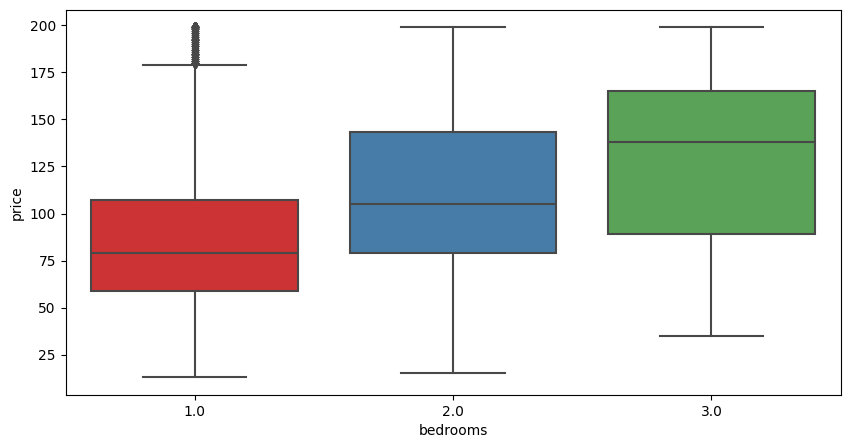

In [81]:
fig=plt.figure(figsize=(10, 5), dpi=100)

sns.boxplot(x='bedrooms', y='price', data=airbnb_df, palette='Set1')
plt.show()

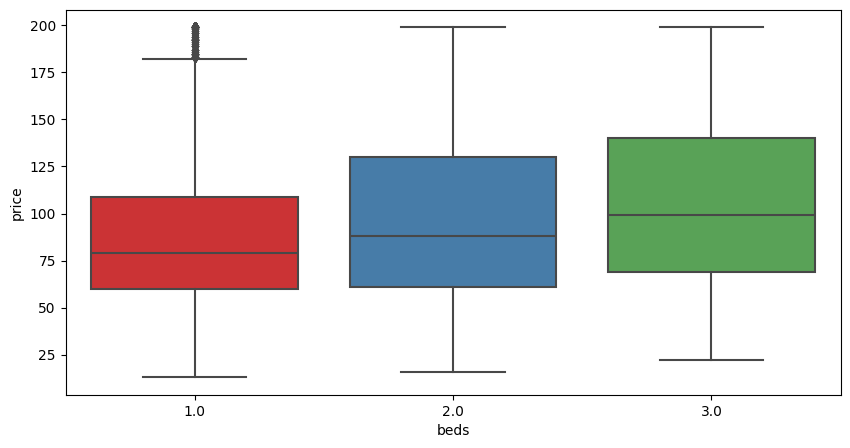

In [82]:
fig=plt.figure(figsize=(10, 5), dpi=100)

sns.boxplot(x='beds', y='price', data=airbnb_df, palette='Set1')
plt.show()

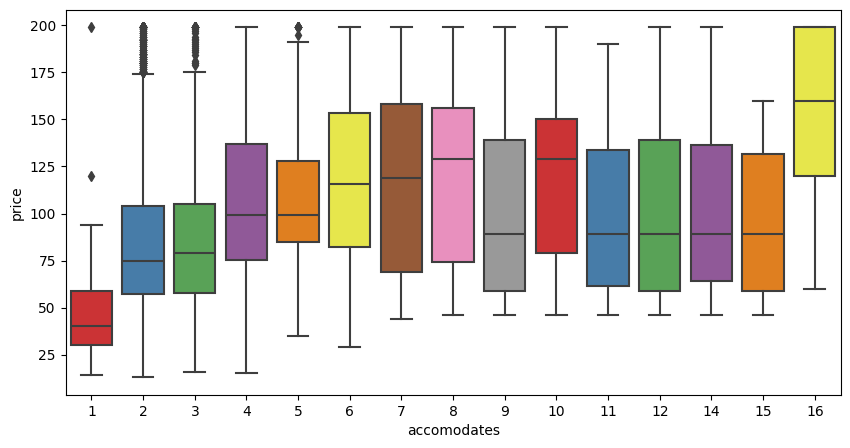

In [83]:
fig=plt.figure(figsize=(10, 5), dpi=100)

sns.boxplot(x='accomodates', y='price', data=airbnb_df, palette='Set1')
plt.show()

In [84]:
#Calculating correlation for beds and price
beds_coefficient, beds_p_value = stats.pearsonr(airbnb_df.price, airbnb_df.beds)
print("Beds Pearson Correlation Coefficient with price is ", beds_coefficient, "and a P-value of:", beds_p_value)

#Calculating correlation for bedrooms and price
bedrooms_coefficient, bedrooms_p_value = stats.pearsonr(airbnb_df.price, airbnb_df.bedrooms)
print("Bedrooms Pearson Correlation Coefficient with price is ", bedrooms_coefficient, "and a P-value of:", bedrooms_p_value)


#Calculating correlation for accomodates and price
accomodates_coefficient, accomodates_p_value = stats.pearsonr(airbnb_df.price, airbnb_df.accomodates)
print("Accommodates Pearson Correlation Coefficient with price is ", accomodates_coefficient, "and a P-value of:", accomodates_p_value)

Beds Pearson Correlation Coefficient with price is  0.17774021609424775 and a P-value of: 2.7144439754725076e-64
Bedrooms Pearson Correlation Coefficient with price is  0.30184347550625806 and a P-value of: 1.6640772691628812e-187
Accommodates Pearson Correlation Coefficient with price is  0.15773582374687234 and a P-value of: 7.503508302739632e-51


Null Hypothesis: There is no correlation between these variables and price.
As we can see the p values for beds, bedrooms and accomodates are very small closer to zero, the null hypothesis is wrong. There is correlation between these variables and price.

Beds Pearson Correlation Coefficient with price is  0.17774021609424775, which is positive implies that with increase in beds, there might be an increase of price as well. But the correlation is a weak one.

Bedrooms Pearson Correlation Coefficient with price is  0.30184347550625806 is also positive and stronger than the beds - price one. This suggests that price tends to increase with increase with the increase in bedrooms

Accommodates Pearson Correlation Coefficient with price is  0.15773582374687234, which is positive. So with increase with accomodates, there are chances that the price should increase. But this has the weakest correlation amongst the three variables.

In [99]:
#Calculating correlation for listing_id and price
listing_id_coefficient, listing_id_p_value = stats.pearsonr(airbnb_df.price, airbnb_df.listing_id)
print("Listing ID Pearson Correlation Coefficient with price is ",listing_id_coefficient , "and a P-value of:", listing_id_p_value)

Listing ID Pearson Correlation Coefficient with price is  0.00852546721086537 and a P-value of: 0.42047793949203877


In [85]:
airbnb_df.property_type.value_counts()

Entire rental unit                     5691
Entire condominium (condo)              529
Entire serviced apartment               522
Entire loft                             450
Entire townhouse                        261
Private room in rental unit             253
Private room in townhouse               218
Room in boutique hotel                  218
Private room in residential home        189
Entire residential home                 185
Room in aparthotel                      121
Private room in bed and breakfast        75
Room in hotel                            39
Private room in condominium (condo)      35
Private room                             30
Entire guest suite                       30
Private room in loft                     13
Entire vacation home                     12
Entire guesthouse                         7
Private room in guest suite               7
Private room in boat                      5
Private room in guesthouse                5
Private room in casa particular 

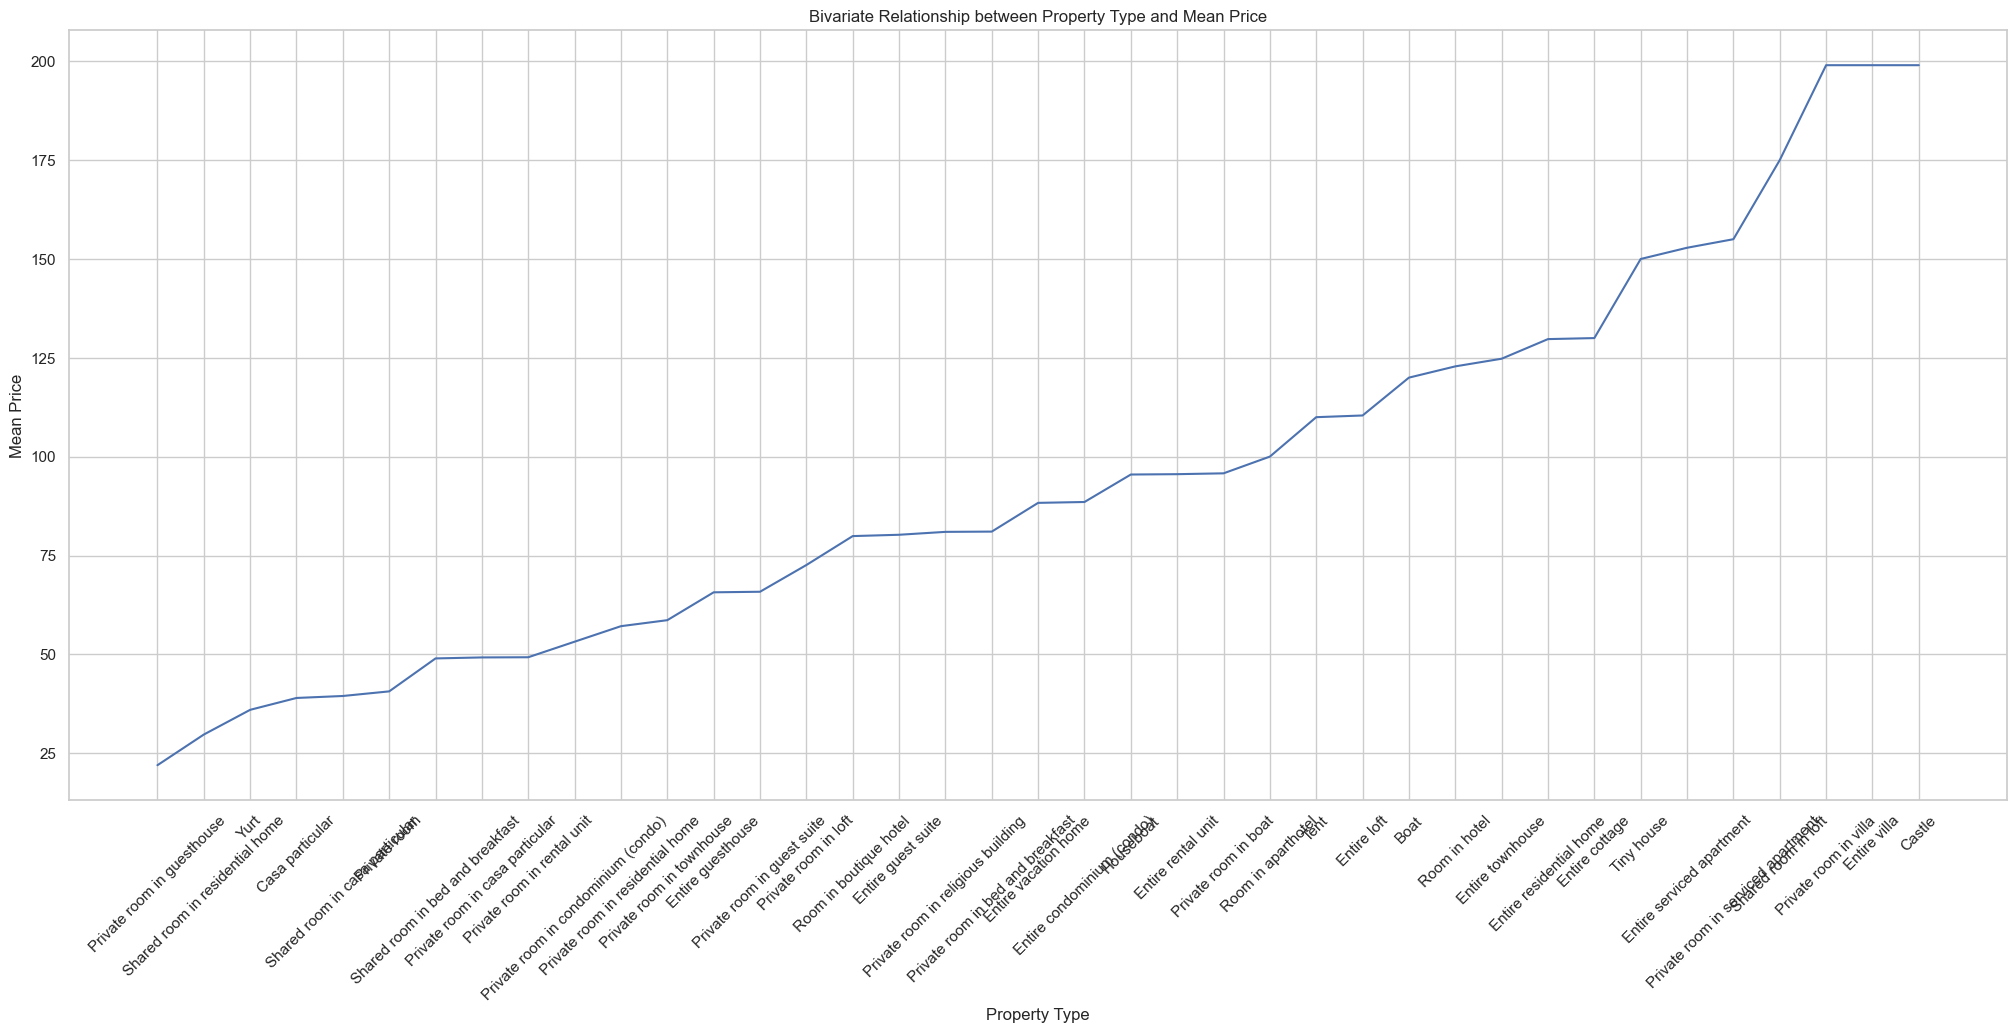

In [94]:
# Calculate the mean price for each property type
mean_prices = airbnb_df.groupby('property_type')['price'].mean().sort_values()

# Create a line plot
plt.figure(figsize=(25,10))
sns.lineplot(x=mean_prices.index, y=mean_prices.values)
plt.title('Bivariate Relationship between Property Type and Mean Price')
plt.xlabel('Property Type')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


It can be observed that different property types are having different prices. So their is a correlation between the variables.

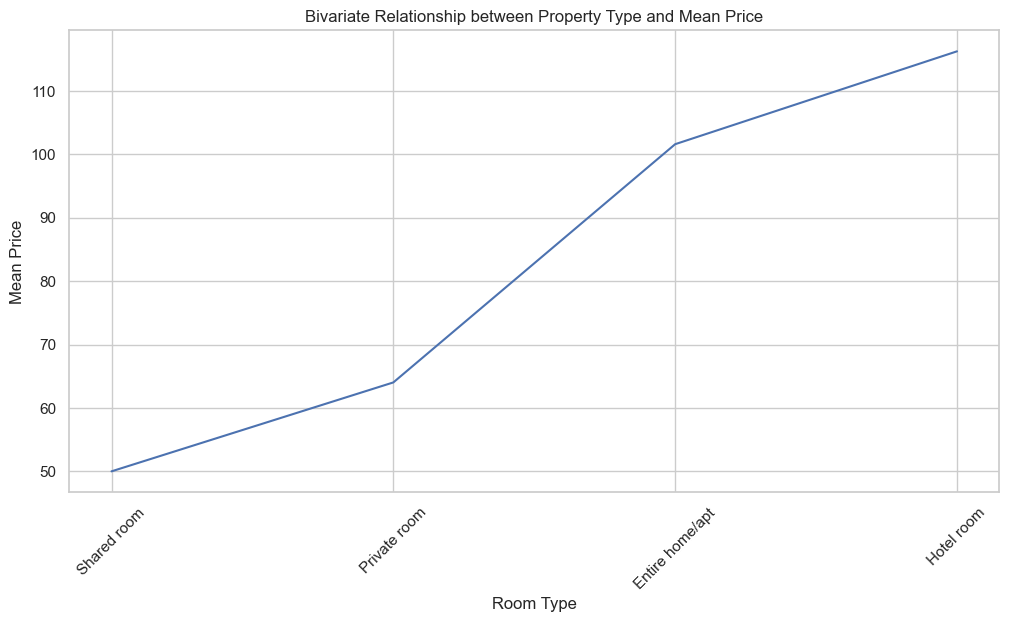

In [97]:
# Calculate the mean price for each property type
mean_prices = airbnb_df.groupby('room_type')['price'].mean().sort_values()

# Create a line plot
plt.figure(figsize=(12,6))
sns.lineplot(x=mean_prices.index, y=mean_prices.values)
plt.title('Bivariate Relationship between Property Type and Mean Price')
plt.xlabel('Room Type')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

We can observe that change in room type is having and impact on the price. So there is correlation between the two variables